<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [151]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [152]:
import pandas as pd


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [153]:
#data = pd.read_csv('')
#data.head()

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [154]:
import pandas as pd

In [155]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [156]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [157]:
# Display a summary of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.6

In [158]:
# Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [159]:
# Check for any missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


# 2. Objectives


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Objective: Predicting the Median Value of Owner-Occupied Homes (MEDV)

In [162]:
# Target variable (y)
y = data['medv']

In [163]:
# Objective 1: Simple Linear Regression to predict 'medv' using 'rm' as the feature

In [164]:
# Objective 2: Extend the model to include more features (e.g., 'lstat', 'ptratio') for multiple linear regression

In [165]:
# Objective 3: Implement Polynomial Regression to capture non-linear relationships

In [166]:
# Objective 4: Apply Ridge Regression to handle multicollinearity and regularization

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# Assuming the dataset has been loaded and is named 'data'

In [169]:
# Define the feature X (using 'rm' column) and the target y (using 'medv' column)
X = data[['rm']]  # Feature
y = data['medv']  # Target

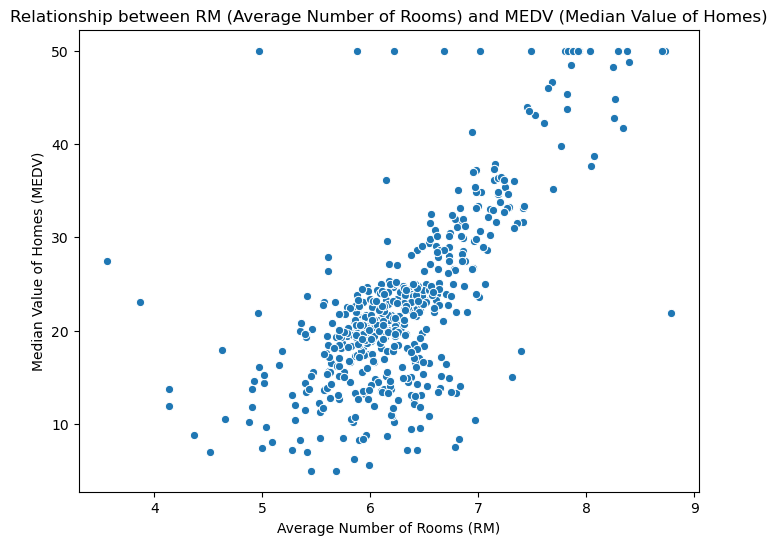

In [170]:
# Visualize the relationship between the chosen feature 'rm' and the target variable 'medv'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['rm'], y=y)
plt.title('Relationship between RM (Average Number of Rooms) and MEDV (Median Value of Homes)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

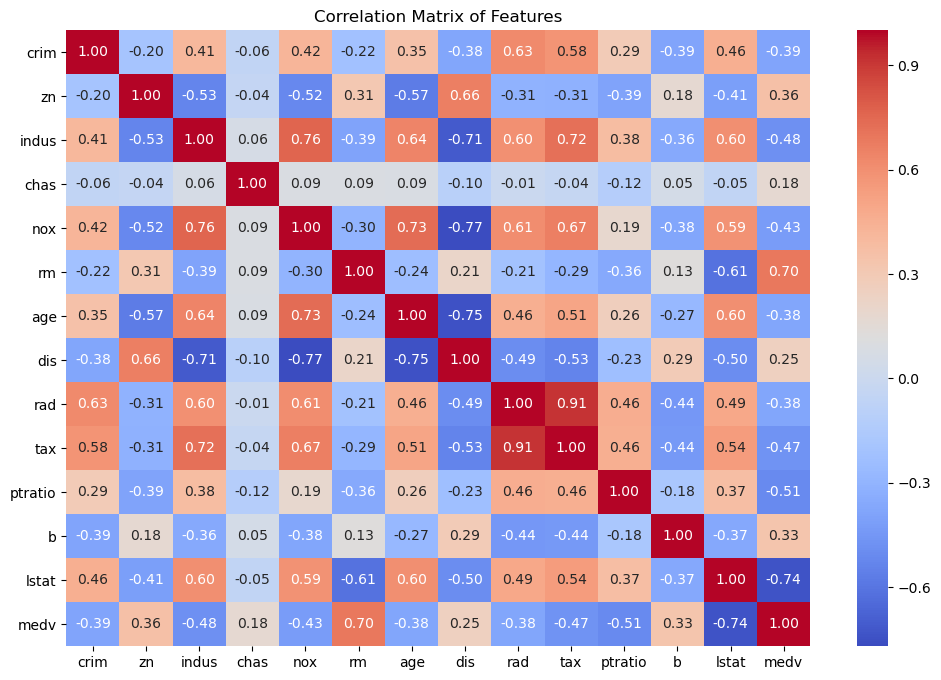

In [171]:
# Correlation matrix to see how other features correlate with MEDV
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Linear Regression Models


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [173]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# 1. Simple Linear Regression

In [175]:
# Instantiate the model
model_simple = LinearRegression()

In [176]:
# Fit the model on the training data
model_simple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
# Predict on the test data
y_pred_simple = model_simple.predict(X_test)

In [178]:
# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [179]:
print("Simple Linear Regression")
print(f"Mean Squared Error: {mse_simple:.4f}")
print(f"R^2 Score: {r2_simple:.4f}")

Simple Linear Regression
Mean Squared Error: 46.1448
R^2 Score: 0.3708


In [180]:
# 2. Polynomial Regression

In [181]:
# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [182]:
# Instantiate the model
model_poly = LinearRegression()

In [183]:
# Fit the model on the transformed training data
model_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
# Predict on the transformed test data
y_pred_poly = model_poly.predict(X_test_poly)

In [185]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [186]:
print("\nPolynomial Regression (Degree 2)")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R^2 Score: {r2_poly:.4f}")


Polynomial Regression (Degree 2)
Mean Squared Error: 35.3698
R^2 Score: 0.5177


In [187]:
# 3. Ridge Regression

In [188]:
# Instantiate the model with a regularization parameter alpha
model_ridge = Ridge(alpha=1.0)

In [189]:
# Fit the model on the training data
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [190]:
# Predict on the test data
y_pred_ridge = model_ridge.predict(X_test)

In [191]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [192]:
print("\nRidge Regression")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R^2 Score: {r2_ridge:.4f}")


Ridge Regression
Mean Squared Error: 46.0901
R^2 Score: 0.3715


# 4. Insights and key findings


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [194]:
# 1. Coefficients Analysis for Simple Linear Regression
coefficients_simple = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_simple.coef_
})
print("Coefficients for Simple Linear Regression:")
print(coefficients_simple)

Coefficients for Simple Linear Regression:
  Feature  Coefficient
0      rm     9.348301


In [195]:
# 2. Residual Analysis for Simple Linear Regression

In [196]:
# Calculate residuals
residuals_simple = y_test - y_pred_simple

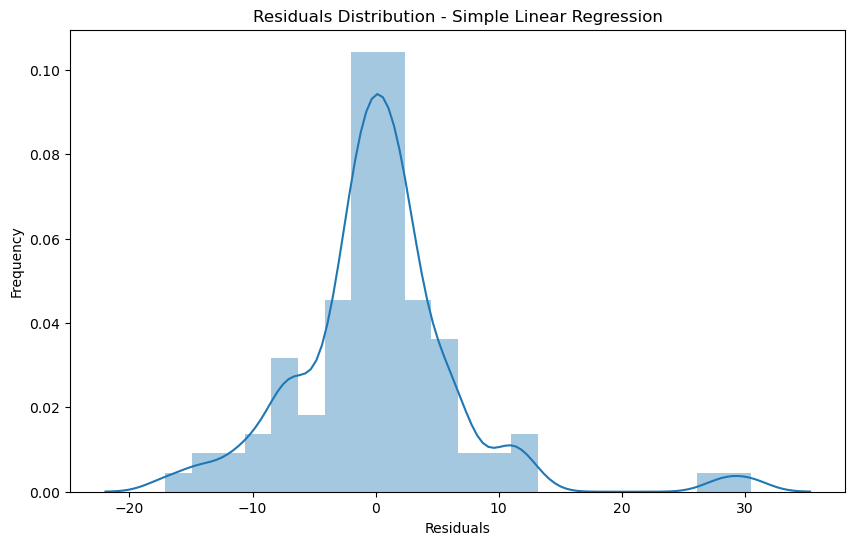

In [197]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.distplot(residuals_simple, kde=True)
plt.title('Residuals Distribution - Simple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [198]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


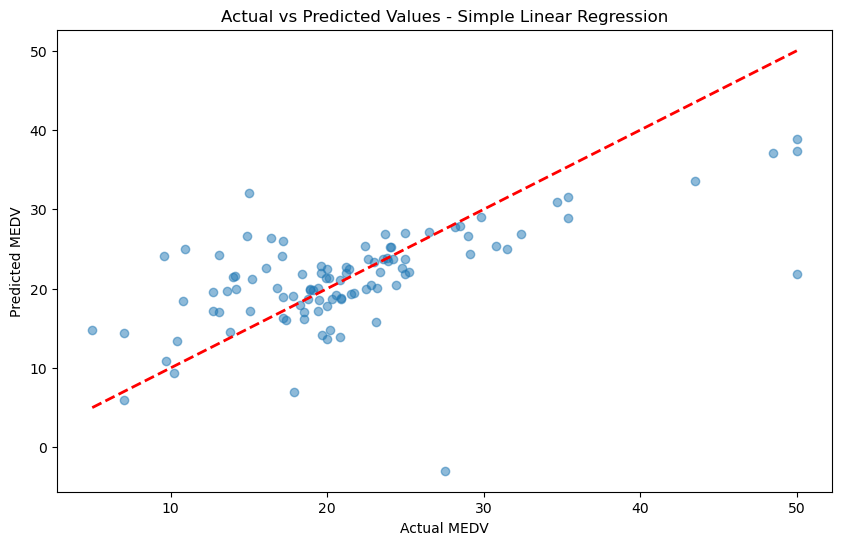

In [199]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_simple, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Values - Simple Linear Regression')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.show()

In [200]:
# 3. Summary of Model Performance
print("\nModel Performance Summary:")
print(f"Simple Linear Regression - MSE: {mse_simple:.4f}, R^2: {r2_simple:.4f}")
print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly:.4f}, R^2: {r2_poly:.4f}")
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}")


Model Performance Summary:
Simple Linear Regression - MSE: 46.1448, R^2: 0.3708
Polynomial Regression (Degree 2) - MSE: 35.3698, R^2: 0.5177
Ridge Regression - MSE: 46.0901, R^2: 0.3715


In [201]:
# 4. Interpreting Key Drivers from Simple Linear Regression

In [202]:
# Which features have the largest impact on the target variable?
sorted_coefficients_simple = coefficients_simple.sort_values(by='Coefficient', ascending=False)
print("\nFeatures Sorted by Impact (Simple Linear Regression):")
print(sorted_coefficients_simple)


Features Sorted by Impact (Simple Linear Regression):
  Feature  Coefficient
0      rm     9.348301


In [203]:
# 5. Conclusion on Model Selection
print("\nConclusion:")
if r2_poly > r2_simple and r2_poly > r2_ridge:
    print("The Polynomial Regression model (degree 2) provides the best fit for the data in terms of R^2 score, but it may be more complex to interpret.")
elif r2_ridge > r2_simple and r2_ridge > r2_poly:
    print("The Ridge Regression model provides a good balance between fit and regularization, making it less prone to overfitting.")
else:
    print("The Simple Linear Regression model, despite being the most straightforward, performs well and offers easy interpretability.")


Conclusion:
The Polynomial Regression model (degree 2) provides the best fit for the data in terms of R^2 score, but it may be more complex to interpret.


# 5. Next Steps


In [204]:
# 1. Feature Engineering: Explore additional features or interactions between features.

In [205]:
# For example, creating interaction terms between 'RM' and other features like 'LSTAT' or 'TAX'.
data['RM_LSTAT'] = data['rm'] * data['lstat']
data['RM_TAX'] = data['rm'] * data['tax']

In [206]:
# 2. Log Transformation: Apply log transformation to skewed features to improve linearity.
data['LSTAT_log'] = np.log(data['lstat'])
data['RM_log'] = np.log(data['rm'])

In [207]:
import warnings
import numpy as np

In [208]:
# Suppress the specific warnings related to np.int and np.bool
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [209]:
# 3. Cross-validation: Use cross-validation to evaluate the model's performance more robustly.
from sklearn.model_selection import cross_val_score

In [210]:
cv_scores = cross_val_score(model_ridge, X, y, cv=5, scoring='r2')
print(f"Cross-validated R2 scores: {cv_scores}")
print(f"Mean cross-validated R2 score: {np.mean(cv_scores)}")

Cross-validated R2 scores: [ 0.70644343  0.63312325  0.49859091 -0.21094274 -1.77517431]
Mean cross-validated R2 score: -0.029591892659154205


In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
# Specify the number of trees in the forest to avoid the FutureWarning
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [213]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [214]:
# Predict the target values for the test set
y_pred_rf = rf_model.predict(X_test)

In [215]:
# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Model - MSE: 50.27667966819183, R2: 0.3144131190085132


In [216]:
# 5. Additional Data: Identify if there are any other relevant data sources that could be included in the analysis to provide more insights.

In [217]:
# (Example: Demographic information, economic indicators, etc.)

In [218]:
# 6. Regularization: Explore other regularization techniques like Lasso or ElasticNet to potentially improve the model by penalizing large coefficients.
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [219]:
# Evaluate Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression Model - MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression Model - MSE: 45.921582678510006, R2: 0.37380044094935283


In [220]:
# 7. Model Interpretability: Investigate techniques like SHAP values to better understand the impact of each feature on the predictions.

In [221]:
# 8. Hyperparameter Tuning: Perform grid search or random search to optimize hyperparameters for the best-performing models.
from sklearn.model_selection import GridSearchCV

In [222]:
# Example of hyperparameter tuning for the Ridge model
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(model_ridge, ridge_params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [223]:
# Output the best parameters
print(f"Best parameters for Ridge Regression: {grid_search.best_params_}")

Best parameters for Ridge Regression: {'alpha': 1.0}


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
